# What is Question Answering?

**Question answering (QA)** is a technology used in the field of **natural language processing (NLP)** that generally refers to the capability of automatically providing answers to questions posed by users. This technology requires the ability to extract and understand information from texts, and is often used to find correct answers from extensive sources of information like databases, documents, or the internet.

    QA systems can primarily be divided into two main categories:

**1. Extractive Question Answering:** 

    In this approach, the system identifies a specific segment (span) of the provided text and returns this segment as the answer. Essentially, the answer to the question is directly taken from a part of the text. These types of systems are typically trained with datasets such as SQuAD (Stanford Question Answering Dataset).
    
![alt text](download.png)

**2. Abstractive Question Answering:**

    Abstractive QA systems can generate answers that go beyond the explicit information in the text by formulating their own sentences. These systems exhibit a deeper understanding by processing the meaning of the text extensively and responding with new expressions that are not explicitly stated in the text.

QA systems are utilized in various applications including *chatbots, customer service automation, research tools*, and *educational applications*. The use of this technology in such ways enhances the capacity to manage and respond to large amounts of information quickly and effectively, providing accurate responses to user inquiries.

1. Veri Setini Yükleme ve Gözden Geçirme

Veri setinizi yükleyin ve ilk birkaç kaydı inceleyerek veri yapılarını gözlemleyin.
Soruların ve bağlamların (context) genel özelliklerini (uzunluk, dil, format) kontrol edin.

2. Veri Tiplerini ve Eksik Değerleri İnceleme

Her sütunun veri tipini kontrol edin ve gerekirse dönüşüm yapın.
Eksik değerleri tespit edin ve bu eksikliklerin model üzerindeki potansiyel etkilerini değerlendirin.

3. Soruların ve Cevapların Analizi

Soruların uzunluğunu analiz edin (örneğin kelime sayısı).
Soruların tipini (kim, ne, nerede, ne zaman, nasıl, neden) sınıflandırın.
Cevapların uzunluğunu ve türlerini (metin, sayı, tarih vs.) analiz edin.
Soru tiplerinin dağılımını inceleyin ve belirli tiplerde yoğunlaşma olup olmadığını gözlemleyin.

4. Kelime Sıklığı ve Dağılımı

Soru ve cevap metinlerinde en sık kullanılan kelimeleri analiz edin.
Kelime bulutu (word cloud) oluşturarak görsel bir analiz yapın.
Stop words (dil bağlamına göre değişir), noktalama işaretleri gibi unsurları temizleyin.

5. Bağlam Analizi

Bağlamın (context) uzunluğunu ve bu uzunluğun sorulara olan etkisini analiz edin.
Bağlam içindeki cevapların konumlarını inceleyin (başlangıçta mı, ortada mı, sonunda mı).

6. Cevapların Bağlam İçindeki Yerleşimi

Cevapların bağlam metni içindeki yerleşimlerini analiz ederek, modelin cevapları hangi metin kısımlarından öğrendiğini gözlemleyin.

7. Görsel ve İstatistiksel Analiz

Soru ve cevap uzunluklarının dağılımını histogramlarla gösterin.
Soru tipleri ve cevap uzunlukları arasındaki ilişkileri çapraz tablolar (cross tabulation) veya kutu grafikleri (box plots) ile inceleyin.

8. İleri Düzey Analizler

Bağlamsal benzerlik veya kelime gömme (embedding) teknikleri kullanarak, metinler arasındaki ilişkileri derinlemesine inceleyin.
Potansiyel olarak zorlayıcı veya yanıltıcı soru-cevap çiftlerini belirleyin.

# Importing Related Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import turn_to_df as ttdf
import os
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse

# Getting English Data and Splitting to Translate Turkish

In [2]:
# training data
input_file_path = r"C:\Users\HILAL-PC\Desktop\Perceptron\input\eng\dataset\train.json"
record_path = ['data','paragraphs','qas','answers']
train = ttdf.squad_json_to_dataframe_train(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  js = pd.io.json.json_normalize(file , record_path )
C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  m = pd.io.json.json_normalize(file, record_path[:-1] )
C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  r = pd.io.json.json_normalize(file,record_path[:-2])


shape of the dataframe is (87599, 6)
Done


C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:28: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  main = pd.concat([ m[['id','question','context']].set_index('id'),js.set_index('q_idx')],1,sort=False).reset_index()


In [3]:
# dev data
input_file_path = r"C:\Users\HILAL-PC\Desktop\Perceptron\input\eng\dataset\dev.json"
record_path = ['data','paragraphs','qas','answers']
verbose = 0
dev = ttdf.squad_json_to_dataframe_dev(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:50: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  js = pd.io.json.json_normalize(file , record_path )
C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:51: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  m = pd.io.json.json_normalize(file, record_path[:-1] )


shape of the dataframe is (10570, 5)
Done


C:\Users\HILAL-PC\Desktop\Perceptron\turn_to_df.py:52: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  r = pd.io.json.json_normalize(file,record_path[:-2])


In [4]:
train.head()

,index,question,context,answer_start,text,c_id
0,5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",515,Saint Bernadette Soubirous,0
1,5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",188,a copper statue of Christ,0
2,5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",279,the Main Building,0
3,5733be284776f41900661181,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",381,a Marian place of prayer and reflection,0
4,5733be284776f4190066117e,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",92,a golden statue of the Virgin Mary,0


In [5]:
dev.head()

,id,question,context,answers,c_id
0,56be4db0acb8001400a502ec,Which NFL team represented the AFC at Super Bo...,Super Bowl 50 was an American football game to...,"[{'answer_start': 177, 'text': 'Denver Broncos...",0
1,56be4db0acb8001400a502ed,Which NFL team represented the NFC at Super Bo...,Super Bowl 50 was an American football game to...,"[{'answer_start': 249, 'text': 'Carolina Panth...",0
2,56be4db0acb8001400a502ee,Where did Super Bowl 50 take place?,Super Bowl 50 was an American football game to...,"[{'answer_start': 403, 'text': 'Santa Clara, C...",0
3,56be4db0acb8001400a502ef,Which NFL team won Super Bowl 50?,Super Bowl 50 was an American football game to...,"[{'answer_start': 177, 'text': 'Denver Broncos...",0
4,56be4db0acb8001400a502f0,What color was used to emphasize the 50th anni...,Super Bowl 50 was an American football game to...,"[{'answer_start': 488, 'text': 'gold'}, {'answ...",0


In [6]:
#train[80000:].to_excel('train_eng_sum_10.xlsx', index=False)

In [7]:
#dev.to_csv('dev_eng.csv', index=False)

In [8]:
train.columns

Index(['index', 'question', 'context', 'answer_start', 'text', 'c_id'], dtype='object')

# Importing Turkish Dataset

In [9]:
ds_path = r"C:\Users\HILAL-PC\Desktop\Perceptron\input\tr"
datasets = [f for f in os.listdir(ds_path) if f.endswith('.xlsx')]

In [10]:
df = pd.concat((pd.read_excel(os.path.join(ds_path, file)) for file in datasets))

In [11]:
df.head()

,indeks,soru,bağlam,cevap_başlangıç,metin,c_id
0,57301a88b2c2fd1400568878,Amerikalı-liberyalılar kabileleri neyi dışladı?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,638,kendi topraklarında vatandaşlık,17270
1,57301a88b2c2fd1400568879,Amerikalı-Liberyalılar ne yapmak için misyonl...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,1024,yerli halkları eğitmek.,17270
2,57301c4fb2c2fd140056888f,William R. Tolbert'in ölümünden kim sorumluydu?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",19,Krahn etnik grubundan Başçavuş Samuel Doe lid...,17271
3,57301c4fb2c2fd1400568890,William R. Tolbert hangi tarihte öldürüldü?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",3,12 Nisan 1980,17271
4,57301c4fb2c2fd1400568891,William R. Tolbert'in öldüğü gün kim idam edi...,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",195,Tolbert'in kabinesinin çoğunluğu ve diğer Amer...,17271


In [12]:
df.rename(columns= {'indeks':'index', ' soru':'question', ' bağlam':'context', 
                    ' cevap_başlangıç':'answer_start', ' metin':'text', ' c_id':'c_id'}, inplace = True)

# Explatory Data Analysis

In [13]:
df.shape

(87599, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87599 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         87599 non-null  object
 1   question      87599 non-null  object
 2   context       87599 non-null  object
 3   answer_start  87599 non-null  int64 
 4   text          87599 non-null  object
 5   c_id          87599 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.7+ MB


### Exploring Data Lengths

In [15]:
df['question_length_w'] = df['question'].apply(lambda x: len(x.split()))
df['context_length_w'] = df['context'].apply(lambda x: len(x.split()))
df['text_length_w'] = df['text'].apply(lambda x: len(x.split()))

In [16]:
df

,index,question,context,answer_start,text,c_id,question_length_w,context_length_w,text_length_w
0,57301a88b2c2fd1400568878,Amerikalı-liberyalılar kabileleri neyi dışladı?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,638,kendi topraklarında vatandaşlık,17270,4,122,3
1,57301a88b2c2fd1400568879,Amerikalı-Liberyalılar ne yapmak için misyonl...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,1024,yerli halkları eğitmek.,17270,8,122,3
2,57301c4fb2c2fd140056888f,William R. Tolbert'in ölümünden kim sorumluydu?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",19,Krahn etnik grubundan Başçavuş Samuel Doe lid...,17271,6,74,9
3,57301c4fb2c2fd1400568890,William R. Tolbert hangi tarihte öldürüldü?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",3,12 Nisan 1980,17271,6,74,3
4,57301c4fb2c2fd1400568891,William R. Tolbert'in öldüğü gün kim idam edi...,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",195,Tolbert'in kabinesinin çoğunluğu ve diğer Amer...,17271,8,74,13
...,...,...,...,...,...,...,...,...,...
9995,573018a5947a6a140053d0dd,Amerikalı-Liberyalılar kiminle özdeşleşmedi?,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",496,karşılaştıkları kabilelerin yerli yerlileri,17269,3,89,4
9996,573018a5947a6a140053d0de,Liberya'ya taşınan Afrikalı Amerikalılar Amer...,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",642,kültürel gelenek,17269,7,89,2
9997,57301a88b2c2fd1400568875,Amerikalı-liberaller kiminle özdeşleşemediler?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,56,"karşılaştıkları yerli halklar,",17270,3,122,3
9998,57301a88b2c2fd1400568876,Amerikalı-liberyalıların Afrikalı kabilelerle...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,285,şiddetli çatışmalar.,17270,5,122,2


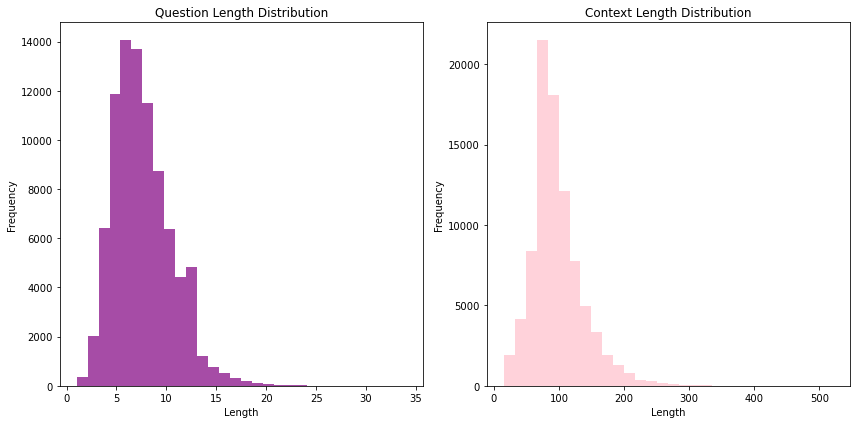

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['question_length_w'], bins=30, color='purple', alpha=0.7)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['context_length_w'], bins=30, color='pink', alpha=0.7)
plt.title('Context Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Classifying Text Types

In [18]:
def classify_text_type(text):
    try:
        float(text)
        return 'Number'
    except ValueError:
        pass

    if isinstance(text, str):
        return 'Text'
    
    else:
        return 'Unknown'

In [19]:
"""    try:
        parse(text, fuzzy=False)
        return 'Date'
    except ValueError:
        pass """

"    try:\n        parse(text, fuzzy=False)\n        return 'Date'\n    except ValueError:\n        pass "

In [20]:
df['text_type'] = df['text'].apply(classify_text_type)

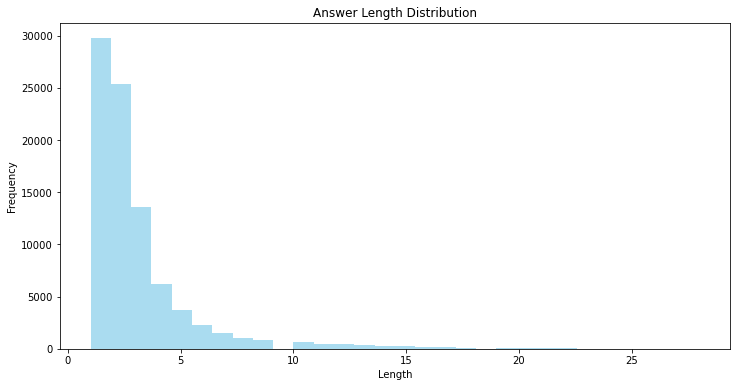

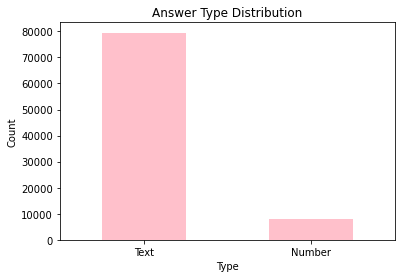

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['text_length_w'], bins=30, color='skyblue', alpha=0.7)
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

df['text_type'].value_counts().plot(kind='bar', color='pink')
plt.title('Answer Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [22]:
df[df['text_type'] == 'Number'][50:]

,index,question,context,answer_start,text,c_id,question_length_w,context_length_w,text_length_w,text_type
716,57312584497a881900248bc5,Sviatoslav hangi yılda liderliği devraldı?,Büyük Prens İgor'un 945 yılında ölümünün ardın...,136,963,17436,5,113,1,Number
719,57312b47497a881900248bf7,Sviatoslav hangi yıl vefat etti?,Büyük Dük unvanının ilk kez ne zaman tanıtıldı...,178,972,17437,5,88,1,Number
724,57312d4da5e9cc1400cdbccd,Kiev'in Hıristiyanlaşması ne zaman başladı?,"Vladimir, babası I. Sviatoslav 972'de öldüğünd...",505,988,17438,5,187,1,Number
731,5731320605b4da19006bce8a,Yaroslav hangi yılda Kiev prensi oldu?,"""Bilge"" olarak bilinen Yaroslav, kardeşleriyle...",510,1019,17440,6,166,1,Number
743,5731365ea5e9cc1400cdbcec,Mstislav ne zaman öldü?,Birleşik devleti koruyan son hükümdar Büyük Ms...,327,1169,17444,4,76,1,Number
...,...,...,...,...,...,...,...,...,...,...
9959,57301f78b2c2fd14005688d4,Hammond-Harwood Evi hangi yılda inşa edildi?,"Yerini aldığı, çoğunlukla saraylar ve kilisele...",292,1774,17261,6,70,1,Number
9961,57302099b2c2fd14005688e5,Gürcü mimarisi hangi yılda terk edilmeye başl...,"Yaklaşık 1840'tan sonra, Gürcü döneminde ortay...",12,1840,17262,7,74,1,Number
9979,57301295b2c2fd1400568800,William Tubman'ın ölümüne yol açan bir askeri...,William Tubman'ın 27 yıllık iktidarından kayna...,103,1980,17266,12,88,1,Number
9988,57301558947a6a140053d099,"""Amerikan kolonizasyon toplumu"" ne zaman kuru...","Amerika Birleşik Devletleri'nde, Amerikalı özg...",153,1816,17268,6,121,1,Number


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
answer_start,87599.0,319.876220,266.352212,0.0,111.0,262.0,468.0,3126.0
c_id,87599.0,9477.616000,5495.417059,0.0,4903.0,9458.0,14245.0,18890.0
question_length_w,87599.0,7.612290,2.850738,1.0,6.0,7.0,9.0,34.0
context_length_w,87599.0,97.089111,40.354552,15.0,72.0,89.0,115.0,521.0
text_length_w,87599.0,2.838160,2.733179,1.0,1.0,2.0,3.0,28.0


### How many different context we have?

In [24]:
len(df["c_id"].unique())

18891

### Classifying Question Types

In [25]:
def classify_question_regex(question):
    question = question.lower().strip()
    if re.search(r'\bkim.*\b', question):
        return 'Kim'
    elif re.search(r'\bne(?!den\b|de\b| zaman\b|rede\b|rde\b).*\b', question):
        return 'Ne'
    elif re.search(r'\bnerede.*\b', question):
        return 'Nerede'
    elif re.search(r'\bne zaman.*\b', question):
        return 'Ne zaman'
    elif re.search(r'\bnasıl.*\b', question):
        return 'Nasıl'
    elif re.search(r'\bneden\b', question):
        return 'Neden'
    elif re.search(r'\bniçin\b', question):
        return 'Neden'
    elif re.search(r'\bhangi.*\b', question):
        return 'Hangi'
    elif re.search(r'\bkaç.*\b', question):
        return 'Kaç'
    else:
        return 'Diğer'

In [26]:
df['question_type'] = df['question'].apply(classify_question_regex)

In [27]:
df['question_type'].value_counts()

Ne          33151
Hangi       25560
Kim          9616
Kaç          5966
Ne zaman     5052
Nasıl        2619
Nerede       2345
Diğer        1824
Neden        1466
Name: question_type, dtype: int64

In [28]:
df

,index,question,context,answer_start,text,c_id,question_length_w,context_length_w,text_length_w,text_type,question_type
0,57301a88b2c2fd1400568878,Amerikalı-liberyalılar kabileleri neyi dışladı?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,638,kendi topraklarında vatandaşlık,17270,4,122,3,Text,Ne
1,57301a88b2c2fd1400568879,Amerikalı-Liberyalılar ne yapmak için misyonl...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,1024,yerli halkları eğitmek.,17270,8,122,3,Text,Ne
2,57301c4fb2c2fd140056888f,William R. Tolbert'in ölümünden kim sorumluydu?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",19,Krahn etnik grubundan Başçavuş Samuel Doe lid...,17271,6,74,9,Text,Kim
3,57301c4fb2c2fd1400568890,William R. Tolbert hangi tarihte öldürüldü?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",3,12 Nisan 1980,17271,6,74,3,Text,Hangi
4,57301c4fb2c2fd1400568891,William R. Tolbert'in öldüğü gün kim idam edi...,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",195,Tolbert'in kabinesinin çoğunluğu ve diğer Amer...,17271,8,74,13,Text,Kim
...,...,...,...,...,...,...,...,...,...,...,...
9995,573018a5947a6a140053d0dd,Amerikalı-Liberyalılar kiminle özdeşleşmedi?,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",496,karşılaştıkları kabilelerin yerli yerlileri,17269,3,89,4,Text,Kim
9996,573018a5947a6a140053d0de,Liberya'ya taşınan Afrikalı Amerikalılar Amer...,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",642,kültürel gelenek,17269,7,89,2,Text,Ne
9997,57301a88b2c2fd1400568875,Amerikalı-liberaller kiminle özdeşleşemediler?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,56,"karşılaştıkları yerli halklar,",17270,3,122,3,Text,Kim
9998,57301a88b2c2fd1400568876,Amerikalı-liberyalıların Afrikalı kabilelerle...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,285,şiddetli çatışmalar.,17270,5,122,2,Text,Nasıl


In [29]:
df[df['question_type'] == 'Ne']

,index,question,context,answer_start,text,c_id,question_length_w,context_length_w,text_length_w,text_type,question_type
0,57301a88b2c2fd1400568878,Amerikalı-liberyalılar kabileleri neyi dışladı?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,638,kendi topraklarında vatandaşlık,17270,4,122,3,Text,Ne
1,57301a88b2c2fd1400568879,Amerikalı-Liberyalılar ne yapmak için misyonl...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,1024,yerli halkları eğitmek.,17270,8,122,3,Text,Ne
6,57301c4fb2c2fd1400568893,ÇHC neyle eleştirildi?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",528,yolsuzluk ve siyasi baskı,17271,3,74,4,Text,Ne
7,57301d82b2c2fd14005688b3,Sonunda isyancılara ne oldu?,İsyancılar kısa sürede birbirleriyle savaşan ç...,16,birbirleriyle savaşan çeşitli gruplara bölündü.,17272,4,68,5,Text,Ne
9,57301d82b2c2fd14005688b5,Ekonomik topluluk izleme grubu krize müdahale...,İsyancılar kısa sürede birbirleriyle savaşan ç...,158,askeri bir görev gücü düzenledi,17272,10,68,5,Text,Ne
...,...,...,...,...,...,...,...,...,...,...,...
9990,57301558947a6a140053d09b,Köle sahipleri ne yapmak istiyordu?,"Amerika Birleşik Devletleri'nde, Amerikalı özg...",353,Güney'den özgür renkli insanları çıkarmak için,17268,5,121,6,Text,Ne
9991,57301558947a6a140053d09c,Afrikalı Amerikalılar göç etmek yerine ne yap...,"Amerika Birleşik Devletleri'nde, Amerikalı özg...",738,Amerika Birleşik Devletleri'ndeki koşulları i...,17268,8,121,5,Text,Ne
9992,573018a5947a6a140053d0da,Afrikalı Amerikalılar biber sahiline ne yapma...,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",108,özgür Afrikalı Amerikalılar için bir koloni k...,17269,8,89,7,Text,Ne
9994,573018a5947a6a140053d0dc,Liberya'ya taşınan Afrikalı Amerikalılar ne o...,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",388,Amerika-Liberyalılar,17269,7,89,1,Text,Ne


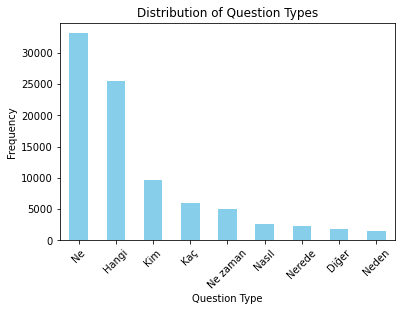

In [30]:
df['question_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

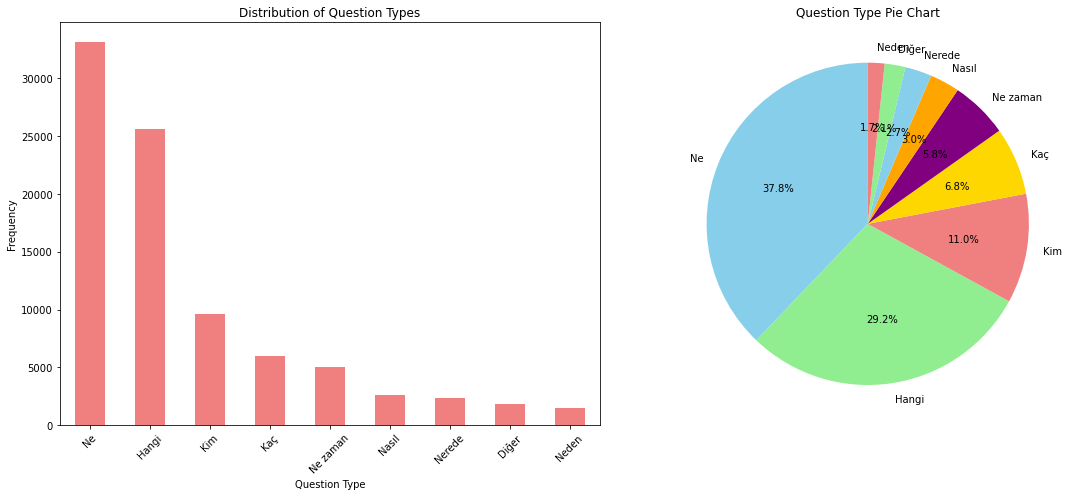

In [31]:
question_counts = df['question_type'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7)) 

question_counts.plot(kind='bar', color='lightcoral', ax=axes[0])
axes[0].set_title('Distribution of Question Types')
axes[0].set_xlabel('Question Type')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

question_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'purple', 'orange'])
axes[1].set_ylabel('')
axes[1].set_title('Question Type Pie Chart')


plt.tight_layout()  # Grafiklerin düzgün sığdırılması için
plt.show()


### Answer Locations

In [32]:
def answer_position(context, answer_start):
    context_length = len(context.split())
    rel_pos = answer_start / context_length
    if rel_pos < 0.33:
        return 'Başlangıç'
    elif rel_pos < 0.66:
        return 'Orta'
    else:
        return 'Son'

df['answer_position'] = df.apply(lambda x: answer_position(x['context'], x['answer_start']), axis=1)

In [33]:
df

,index,question,context,answer_start,text,c_id,question_length_w,context_length_w,text_length_w,text_type,question_type,answer_position
0,57301a88b2c2fd1400568878,Amerikalı-liberyalılar kabileleri neyi dışladı?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,638,kendi topraklarında vatandaşlık,17270,4,122,3,Text,Ne,Son
1,57301a88b2c2fd1400568879,Amerikalı-Liberyalılar ne yapmak için misyonl...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,1024,yerli halkları eğitmek.,17270,8,122,3,Text,Ne,Son
2,57301c4fb2c2fd140056888f,William R. Tolbert'in ölümünden kim sorumluydu?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",19,Krahn etnik grubundan Başçavuş Samuel Doe lid...,17271,6,74,9,Text,Kim,Başlangıç
3,57301c4fb2c2fd1400568890,William R. Tolbert hangi tarihte öldürüldü?,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",3,12 Nisan 1980,17271,6,74,3,Text,Hangi,Başlangıç
4,57301c4fb2c2fd1400568891,William R. Tolbert'in öldüğü gün kim idam edi...,"12 Nisan 1980'de, Krahn etnik grubundan Başçav...",195,Tolbert'in kabinesinin çoğunluğu ve diğer Amer...,17271,8,74,13,Text,Kim,Son
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,573018a5947a6a140053d0dd,Amerikalı-Liberyalılar kiminle özdeşleşmedi?,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",496,karşılaştıkları kabilelerin yerli yerlileri,17269,3,89,4,Text,Kim,Son
9996,573018a5947a6a140053d0de,Liberya'ya taşınan Afrikalı Amerikalılar Amer...,"1822'de Amerikan Sömürgeleştirme Derneği, serb...",642,kültürel gelenek,17269,7,89,2,Text,Ne,Son
9997,57301a88b2c2fd1400568875,Amerikalı-liberaller kiminle özdeşleşemediler?,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,56,"karşılaştıkları yerli halklar,",17270,3,122,3,Text,Kim,Orta
9998,57301a88b2c2fd1400568876,Amerikalı-liberyalıların Afrikalı kabilelerle...,Amerikalı-Liberyalı yerleşimciler karşılaştıkl...,285,şiddetli çatışmalar.,17270,5,122,2,Text,Nasıl,Son


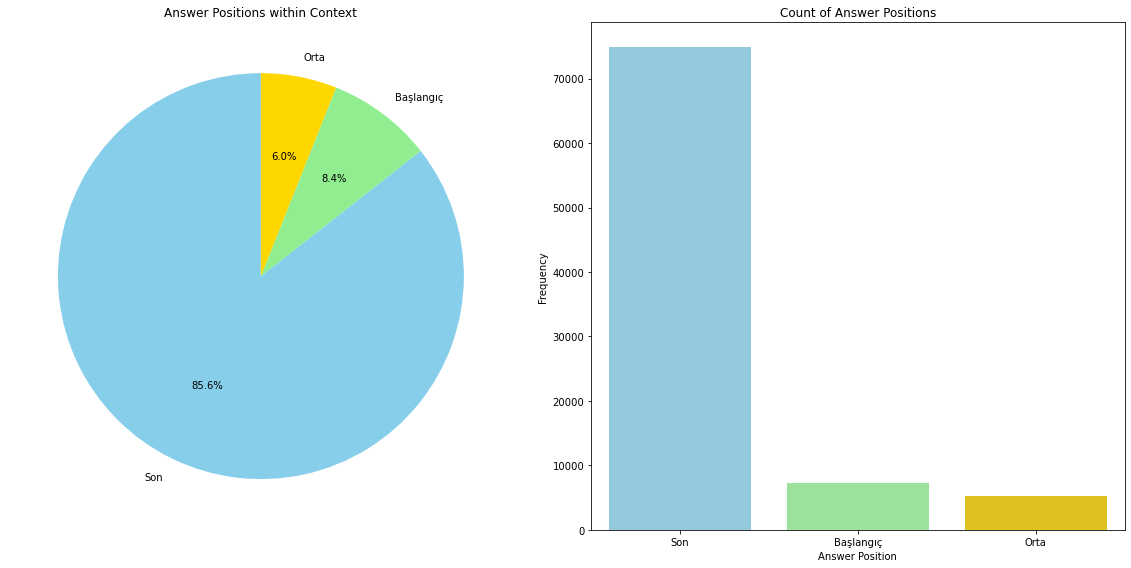

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

df['answer_position'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'gold'], ax=axes[0])
axes[0].set_title('Answer Positions within Context')
axes[0].set_ylabel('')

sns.countplot(x='answer_position', data=df, palette=['skyblue', 'lightgreen', 'gold'], ax=axes[1])
axes[1].set_title('Count of Answer Positions')
axes[1].set_xlabel('Answer Position')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Grafikler arasındaki padding'i otomatik ayarla
plt.show()


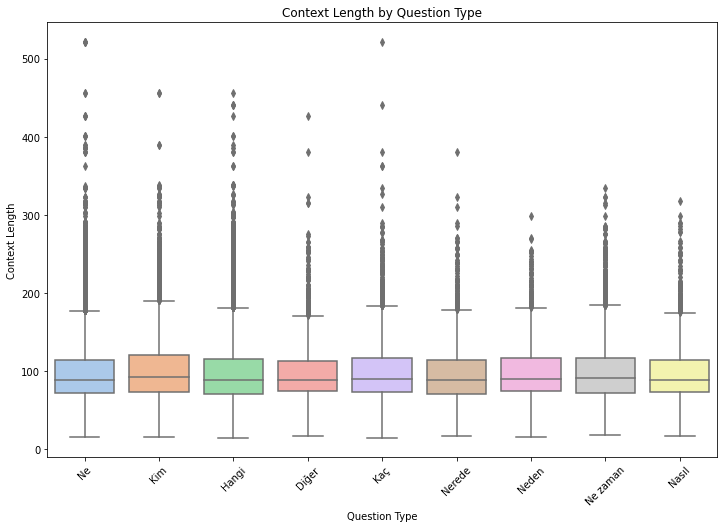

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='question_type', y='context_length_w', data=df, palette="pastel")
plt.title('Context Length by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Context Length')
plt.xticks(rotation=45)
plt.show()

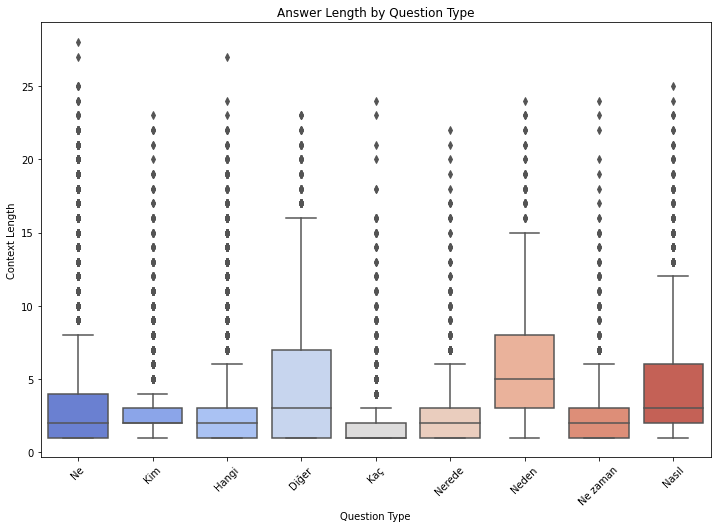

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='question_type', y='text_length_w', data=df, palette="coolwarm")
plt.title('Answer Length by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Context Length')
plt.xticks(rotation=45)
plt.show()

In [37]:
cross_tab = pd.crosstab(df['question_type'], df['text_length_w'])
print(cross_tab)

text_length_w     1     2     3     4     5     6    7    8    9    10  ...  \
question_type                                                           ...   
Diğer            481   382   189   122    95    81   64   59   48   46  ...   
Hangi          10455  7263  3877  1541   926   463  283  178  141   98  ...   
Kaç             4113  1158   387   136    53    22   17   14   16    8  ...   
Kim             2213  4412  1553   583   333   161  113   67   49   26  ...   
Nasıl            524   565   406   240   206   127   97   91   67   56  ...   
Ne              8723  9501  5573  2994  1783  1154  800  541  426  326  ...   
Ne zaman        2427  1178   951   214    92    59   41   15    9   17  ...   
Neden            108   237   213   163   139   132   88   90   65   42  ...   
Nerede           723   721   403   216   116    49   34   18   10   12  ...   

text_length_w  18  19  20  21  22  23  24  25  27  28  
question_type                                          
Diğer          12 

In [38]:
question_type_grouped = df.groupby('question_type')['text_length_w'].describe()
print(question_type_grouped)

                 count      mean       std  min  25%  50%  75%   max
question_type                                                       
Diğer           1824.0  4.857456  4.776688  1.0  1.0  3.0  7.0  23.0
Hangi          25560.0  2.372418  2.106704  1.0  1.0  2.0  3.0  27.0
Kaç             5966.0  1.608113  1.539955  1.0  1.0  1.0  2.0  24.0
Kim             9616.0  2.515807  1.914056  1.0  2.0  2.0  3.0  23.0
Nasıl           2619.0  4.464681  4.038843  1.0  2.0  3.0  6.0  25.0
Ne             33151.0  3.267021  3.020974  1.0  1.0  2.0  4.0  28.0
Ne zaman        5052.0  2.107680  1.809444  1.0  1.0  2.0  3.0  24.0
Neden           1466.0  5.716917  4.145932  1.0  3.0  5.0  8.0  24.0
Nerede          2345.0  2.689979  2.270866  1.0  1.0  2.0  3.0  22.0


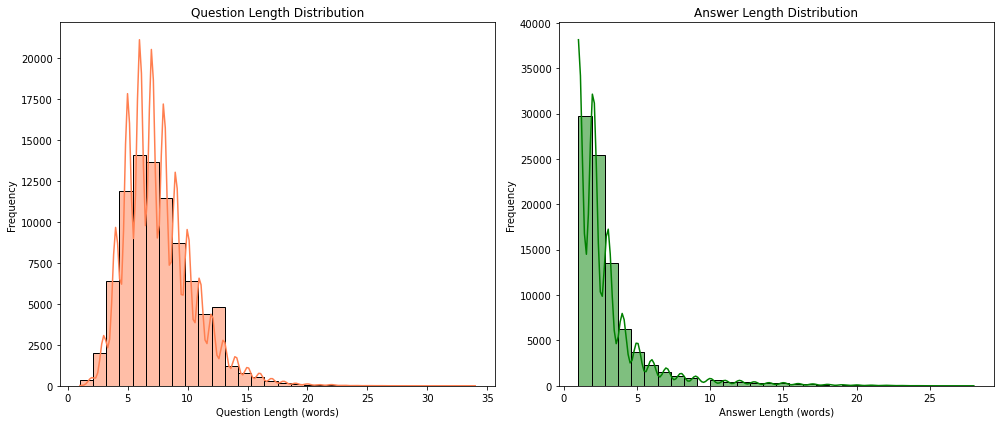

In [39]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['question_length_w'], bins=30, kde=True, color='coral')
plt.title('Question Length Distribution')
plt.xlabel('Question Length (words)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['text_length_w'], bins=30, kde=True, color='green')
plt.title('Answer Length Distribution')
plt.xlabel('Answer Length (words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
